In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('D:\Downloads\pycon-pandas-tutorial-master\data/titles.csv')
print(titles.head())

                 title  year
0   A Trip to the Moon  2017
1  My Wife's Relatives  1939
2     Passione d'amore  1981
3           Purple Day  1999
4       Sud Side Stori  2000


In [4]:
cast = pd.read_csv('D:\Downloads\pycon-pandas-tutorial-master\data/cast.csv')
print(cast.head())

                  title  year      name   type                character     n
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4  31.0
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN


### What are the ten most common movie names of all time?

In [5]:
top_10_movies = titles.value_counts(subset='title').sort_values(ascending=False).head(10)
print('The top 10 Most Common Movies are:')
print(top_10_movies)

The top 10 Most Common Movies are:
title
Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
The Three Musketeers    11
Temptation              11
Othello                 11
Freedom                 11
Maya                    11
Kismet                  10
Name: count, dtype: int64


### Which three years of the 1930s saw the most films released?

In [6]:
movies_1930s = (titles[titles['year'].between(1930, 1939)]
                .value_counts(subset=['year'])
                .sort_values(ascending=False)
                .head(3))
movies_1930s

year
1937    1217
1938    1161
1936    1153
Name: count, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

<Axes: xlabel='decade'>

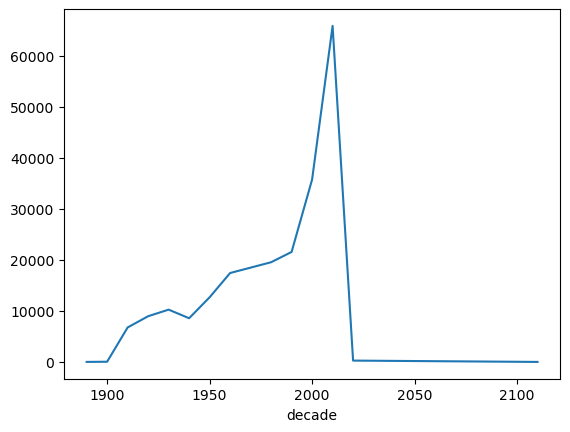

In [7]:
titles['decade'] = (titles['year'] // 10) * 10
number_of_films_per_decade = titles.groupby(by= 'decade')['title'].count().sort_index(ascending=True).plot(kind='line')
number_of_films_per_decade


### Plot the number of "Hamlet" films made each decade.

<Axes: xlabel='decade'>

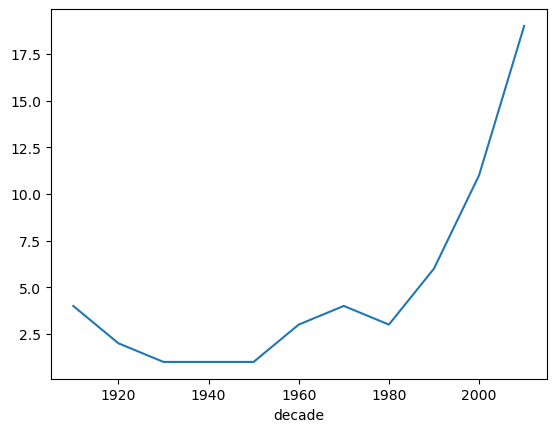

In [8]:
hamlet_movies = titles[titles['title'].str.contains('Hamlet', case=False, na=False)]
hamlet_movies_per_decade = hamlet_movies.groupby('decade')['title'].count().plot(kind='line')
hamlet_movies_per_decade

### Plot the number of "Rustler" characters in each decade of the history of film.

In [9]:
cast['decade'] = (cast['year'] // 10) *10
cast

,title,year,name,type,character,n,decade
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,2010
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0,1980
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,2010
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN,2010
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN,2010
...,...,...,...,...,...,...,...
3442897,Foxtrot,1988,Lilja Þórisdóttir,actress,Dóra,24.0,1980
3442898,Niceland (Population. 1.000.002),2004,Sigríður Jóna Þórisdóttir,actress,Woman in Bus,26.0,2000
3442899,Skammdegi,1985,Dalla Þórðardóttir,actress,Hjúkrunarkona,9.0,1980
3442900,U.S.S.S.S...,2003,Kristín Andrea Þórðardóttir,actress,Afgr.dama á bensínstöð,17.0,2000


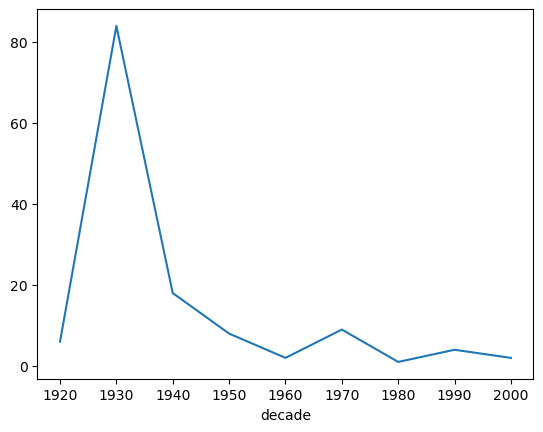

In [10]:
cast_rustler = cast[cast['character'] == 'Rustler']
cast_rustler_agg = cast_rustler.groupby('decade')['character'].count().plot(kind='line')

### Plot the number of "Hamlet" characters each decade.

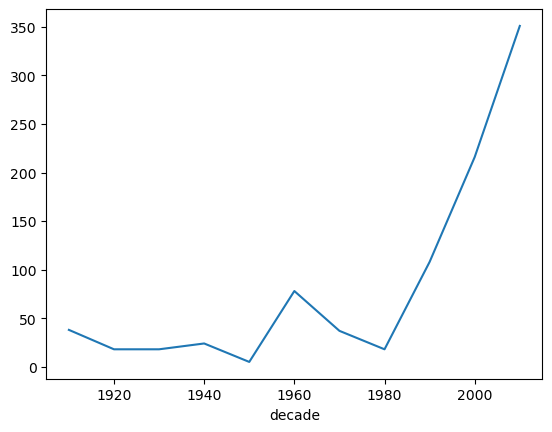

In [11]:
hamlet_cast = cast[cast['title'].str.contains('Hamlet', case=False, na=False)]
hamlet_cast_agg = hamlet_cast.groupby('decade')['character'].count().plot(kind='line')

### What are the 11 most common character names in movie history?

In [12]:
cast_common11 = cast['character'].value_counts(ascending=False).head(11)
cast_common11

character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Minor Role      6203
Name: count, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [13]:
herself = cast[cast['character'] == 'Herself']
top10_herself = herself['name'].value_counts().head(10)
top10_herself

name
Queen Elizabeth II           11
Luisa Horga                   9
María Luisa (V) Martín        9
Hillary Clinton               8
Joyce Brothers                8
Margaret Thatcher             8
Marilyn Monroe                6
María Isabel (III) Martín     6
Rekha                         6
Joan Rivers                   6
Name: count, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [14]:
himself = cast[cast['character'] == 'Himself']
top10_himself = himself['name'].value_counts().head(10)
top10_himself

name
Adolf Hitler          91
Richard Nixon         43
Ronald Reagan         37
John F. Kennedy       35
Winston Churchill     24
George W. Bush        24
Martin Luther King    23
Bill Clinton          22
Benito Mussolini      21
Ron Jeremy            20
Name: count, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [15]:
cast_1945 = cast.loc[cast['year'] == 1945]
top_1945 = cast_1945.groupby('name')['character'].count().sort_values(ascending=False).head(10)
print(top_1945)

name
Emmett Vogan       37
Sam (II) Harris    31
Bess Flowers       28
Harold Miller      28
Franklyn Farnum    27
Nolan Leary        26
Herman Hack        25
Larry Steers       25
Tom London         24
Kenner G. Kemp     24
Name: character, dtype: int64


### Which actors or actresses appeared in the most movies in the year 1985?

In [16]:
cast_1985 = cast.loc[cast['year'] == 1985]
top_1985 = cast_1985.groupby('name')['character'].count().sort_values(ascending=False).head(10)
print(top_1985)

name
Mammootty        22
Sukumari         20
Shakti Kapoor    19
Raj Babbar       15
Mohanlal         15
Lou Scheimer     15
Rajesh Khanna    13
Asrani           13
Om Shivpuri      13
Aruna Irani      13
Name: character, dtype: int64


### Plot how many roles Mammootty has played in each year of his career.

<Axes: xlabel='year'>

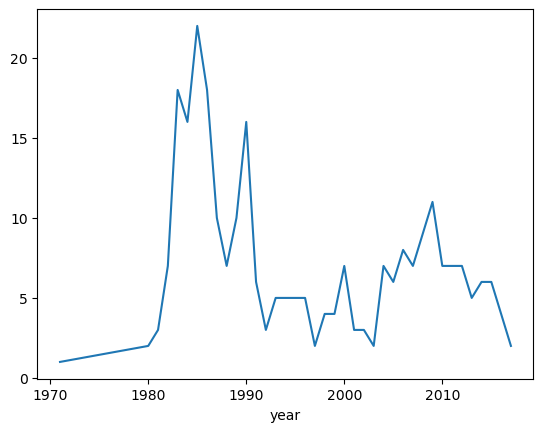

In [17]:
mammootty_alltimeroles = cast.loc[cast['name'].str.contains('Mammootty', na=False, case=False)].groupby('year').size().plot(kind='line')
mammootty_alltimeroles

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [18]:
top_10_patron = (cast[cast['character'].str.startswith('Patron in', na=False)]
                 .value_counts(subset='character')
                 .head(10))
print(top_10_patron)

character
Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       8
Patron in Billiard Parlor        5
Patron in cabaret                3
Patron in Restaurant             3
Patron in Bar                    3
Patron in restaurant             3
Patron in Club                   3
Patron in Audience               2
Name: count, dtype: int64


### What are the 10 most frequent roles that start with the word "Science"?

In [19]:
top_10_science = (cast[cast['character'].str.startswith('Science', na=False)]
                  .value_counts(subset='character')
                  .head(10))
print(top_10_science)

character
Science Teacher         57
Science Fair Student     9
Science Fair Judge       6
Science Student          6
Science Fair Kid         5
Science Reporter         5
Science Kid              5
Science                  4
Science teacher          3
Science Officer          3
Name: count, dtype: int64


### Plot the n-values of the roles that Judi Dench has played over her career.

<Axes: xlabel='year'>

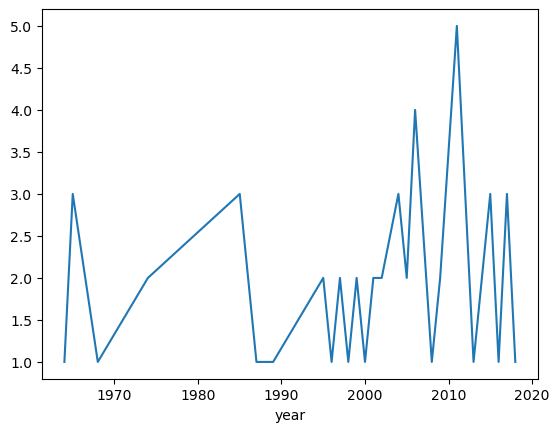

In [20]:
judi_role = cast[cast['name'] == 'Judi Dench']
judi_role.groupby('year')['name'].count().plot(kind='line')


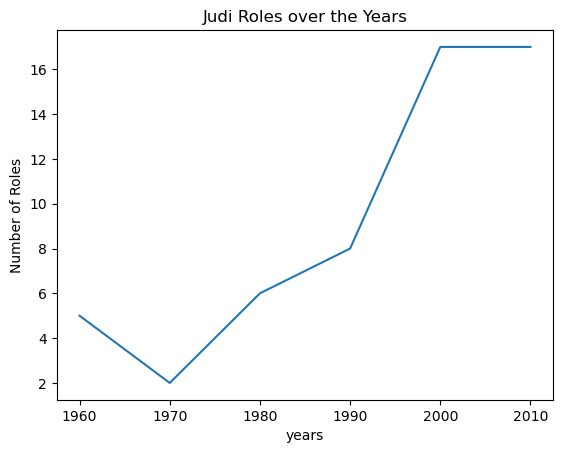

In [21]:
judi_role2 = (cast.loc[cast['name']
                      .str.contains('Judi Dench', case=False, na=False)]
                      .groupby('decade')
                      .size()
                      .plot(kind='line', 
                            title='Judi Roles over the Years',
                            xlabel= 'years',
                            ylabel= 'Number of Roles')
)

### Plot the n-values of Cary Grant's roles through his career.

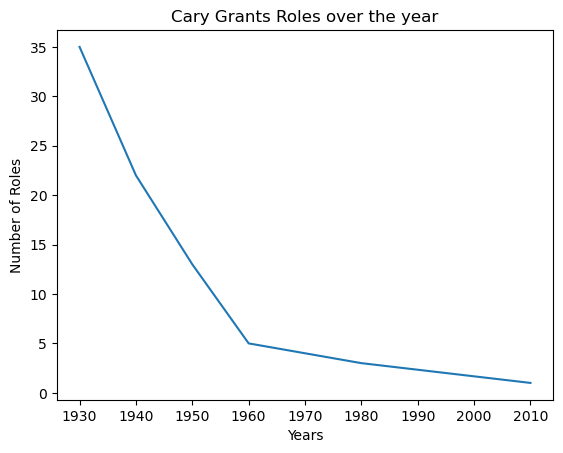

In [22]:
# 
cary = cast[cast['name'] == 'Cary Grant']
cary_roles = (cary.groupby('decade')['name']
              .count()
              .plot(kind= 'line',
                    title= 'Cary Grant''s Roles over the year',
                    xlabel= 'Years',
                    ylabel= 'Number of Roles'))

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

<Axes: xlabel='year'>

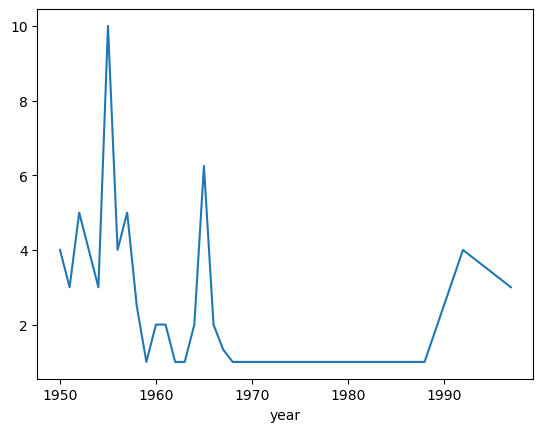

In [23]:
sidney_roles = cast.loc[cast['name'] == 'Sidney Poitier'].groupby('year')['n'].mean().plot(kind='line')
sidney_roles

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

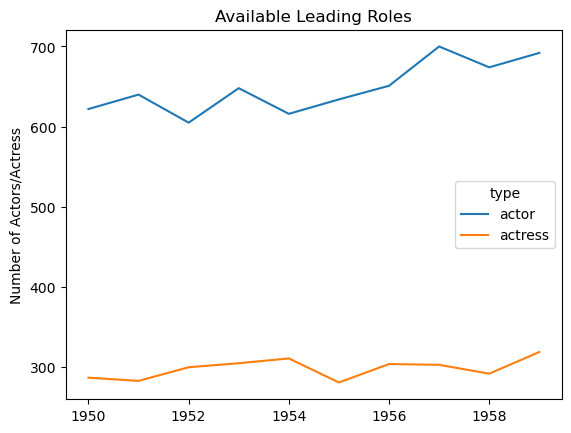

In [24]:
leading_roles = (cast.loc[(cast['n'] == 1) & (cast['year'].between(1950, 1959))]
                 .pivot_table(values='n', 
                              index='year', 
                              columns='type', 
                              aggfunc='count')
                    .plot(kind='line',
                      xlabel='',
                      ylabel='Number of Actors/Actress',
                      title='Available Leading Roles'))

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

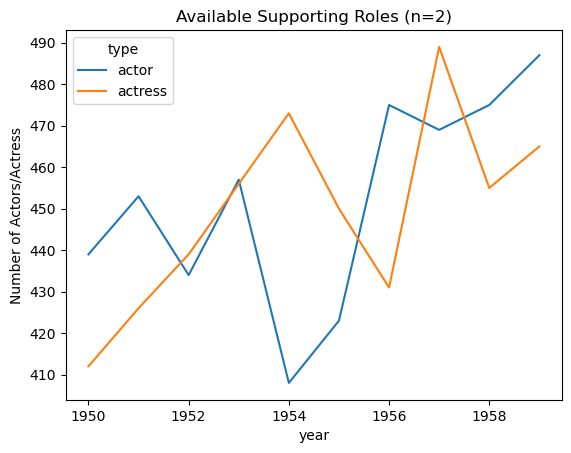

In [25]:
supporting_roles = (cast.loc[(cast['year'].between(1950, 1959) & (cast['n'] == 2))]
                    .pivot_table(index='year', 
                                 columns='type', 
                                 values='n', 
                                 aggfunc='count')
                    .plot(kind= 'line',
                          title= 'Available Supporting Roles (n=2)',
                          xlabel= 'year',
                          ylabel= 'Number of Actors/Actress'))